<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px" />

# Quiz 2

This notebook contains 5 parts. You are to fill in this quiz with your answers, taking special care to follow the directions _exactly_.

To **submit** your quiz, drop your completed notebook in the file uploader in the provided Google Form.

### Quiz Information:
- This is an "open book" quiz - you may use any resources! This includes Jupyter notebooks, Google, StackOverflow, and your notes. ANY RESOURCE YOU USE MUST BE CITED (comment your code with links, which lesson you got the inspiration from, etc.) and failure to cite resources you use will be considered plagiarism. 
- You may NOT work with anyone else on this quiz (your classmates, your instructor, etc.).
- You will have one hour to take this quiz.

## Part 1: Getting the data
The dataset provided in this repository (`./data/concrete.csv`) consists of various amounts of different components used to create concrete and the concrete's [compressive strength](https://www.aboutcivil.org/compressive-strength-of-concrete.html). A data dictionary for this dataset can be found in the README.

**Read in the data and display the first 5 rows.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
# I forgot the package that train_test_split comes from, 
# a quick google search tells me it is in model_selection
from sklearn.model_selection import train_test_split

# I forget this specific package too, so often I google the function name to find the library
from statsmodels.regression.linear_model import OLS

# From Lecture 3.02 mutiple regression
import statsmodels.api as sm

In [2]:
df_concrete = pd.read_csv('./data/concrete.csv', index_col=0)

In [3]:
df_concrete.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,NaN,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,NaN,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,NaN,978.4,825.5,360,44.30


## Part 2: Data Cleaning

There are a few issues with this dataset. To help you identify and fix these issues, you are told:
- The `Unnamed: 0` column should not be a part of this dataset.
- Any null values in this dataset are clerical errors. They should all be 0's.
- All columns in this dataset should be numeric.

**Please clean up the dataset.**

In [4]:
df_concrete.isnull().sum()

Cement                             0
Blast Furnace Slag                 0
Fly Ash                            0
Water                              0
Superplasticizer                 379
Coarse Aggregate                   0
Fine Aggregate                     0
Age                                0
Concrete compressive strength      0
dtype: int64

In [5]:
df_concrete = df_concrete.replace(np.nan, 0)

In [6]:
df_concrete.isnull().sum()

Cement                           0
Blast Furnace Slag               0
Fly Ash                          0
Water                            0
Superplasticizer                 0
Coarse Aggregate                 0
Fine Aggregate                   0
Age                              0
Concrete compressive strength    0
dtype: int64

In [7]:
df_concrete.dtypes

Cement                           float64
Blast Furnace Slag               float64
Fly Ash                          float64
Water                            float64
Superplasticizer                 float64
Coarse Aggregate                 float64
Fine Aggregate                   float64
Age                               object
Concrete compressive strength    float64
dtype: object

In [ ]:
# This one is a value error to detect which line is not an integer

In [8]:
pd.to_numeric(df_concrete['Age'])

ValueError: Unable to parse string "'28'" at position 434

In [14]:
# The below formula was figured out for lab 3.01 by the DSI 824, and I have remembered it here
# I kept running into thse copywithsetting errors, but not anymore

In [15]:
df_concrete.loc[434, 'Age'] = 28

In [16]:
df_concrete['Age'] = pd.to_numeric(df_concrete['Age'])

In [17]:
df_concrete.dtypes

Cement                           float64
Blast Furnace Slag               float64
Fly Ash                          float64
Water                            float64
Superplasticizer                 float64
Coarse Aggregate                 float64
Fine Aggregate                   float64
Age                                int64
Concrete compressive strength    float64
dtype: object

In [18]:
# All columns have been converted into numeric datatypes

## Part 3: EDA

You are asked to give the following to the hiring manager:
- Descriptive statistics of the Water column
- A scatterplot of Coarse Aggregate compared to Fine Aggregate colored purple with a title and axis labels

**Please display these.**

In [19]:
df_concrete.describe()['Water']

count    1030.000000
mean      181.567282
std        21.354219
min       121.800000
25%       164.900000
50%       185.000000
75%       192.000000
max       247.000000
Name: Water, dtype: float64

Text(0, 0.5, 'Fine Aggregate')

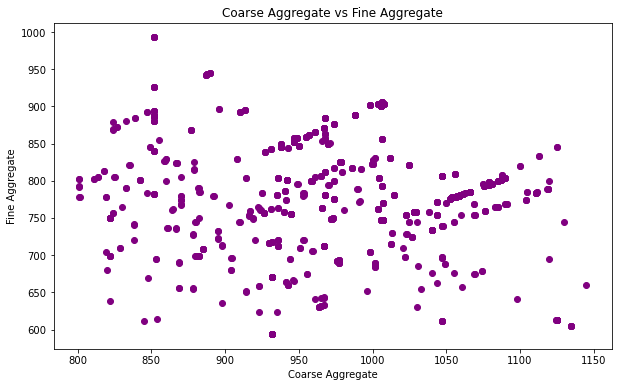

In [20]:
plt.figure(figsize=(10, 6))
plt.title('Coarse Aggregate vs Fine Aggregate')
plt.scatter(df_concrete['Coarse Aggregate'], df_concrete['Fine Aggregate'], c='purple')
plt.xlabel('Coarse Aggregate')
plt.ylabel('Fine Aggregate')

## Part 4: Modeling

**Fit a linear regression model to predict the concrete compressive strength.** 
* Please use a random state of `2020` when splitting your data
* Use 80% of the dataset for training and the other 20% for testing
* Print out and interpret the testing R<sup>2</sup>.

In [21]:
df_concrete.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [22]:
X = df_concrete.drop('Concrete compressive strength', axis=1)
y = df_concrete['Concrete compressive strength']

In [23]:
X.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [24]:
y.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Concrete compressive strength, dtype: float64

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=2020, test_size=0.2)

In [26]:
X_train.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
476,446.0,24.0,79.0,162.0,11.6,967.0,712.0,3
370,218.9,0.0,124.1,158.5,11.3,1078.7,794.9,14
923,162.0,207.0,172.0,216.0,10.0,822.0,638.0,28
785,331.0,0.0,0.0,192.0,0.0,978.0,825.0,7
1001,297.8,137.2,106.9,201.3,6.0,878.4,655.3,28


In [27]:
lr = LinearRegression()

In [28]:
lr.fit(X=X_train, y=y_train)

LinearRegression()

In [29]:
# R^2 Score
lr.score(X_test, y_test)

0.5979187032701264

In [30]:
# I still have problems understanding what these numbers inherently mean, here is a source I used
# Source: https://corporatefinanceinstitute.com/resources/knowledge/other/r-squared/#:~:text=The%20most%20common%20interpretation%20of,better%20fit%20for%20the%20model.
'''
The most common interpretation of r-squared is how well the regression model 
fits the observed data. For example, an r-squared of 60% reveals that 60% 
of the data fit the regression model. Generally, a higher r-squared indicates 
a better fit for the model.
''';

In [31]:
# The linear model score for our validation data says that we have an r^2 of 59 %
# This indicates that 59 % of the testing data fit the regression model
# It isn't a good model, but it is slightly better than randomly guessing (R^2 = 50%)

## Part 5: Interpretation

The firm is especially interested in learning more about the effects of [superplasticizer](https://en.wikipedia.org/wiki/Superplasticizer).

**They ask you what effect the Superplasticizer has on the concrete compressive strength. How would you respond? Be as specific as possible.**

In [32]:
# I'm going to use the ols library and conduct a test using statsmodel
# source: https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html

# The analysis path for this portion was inspired by lecture 3.02, regression metrics

In [33]:
# Let's have two models, one with an intercept and one without

In [34]:
X_train

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
476,446.0,24.0,79.0,162.0,11.6,967.0,712.0,3
370,218.9,0.0,124.1,158.5,11.3,1078.7,794.9,14
923,162.0,207.0,172.0,216.0,10.0,822.0,638.0,28
785,331.0,0.0,0.0,192.0,0.0,978.0,825.0,7
1001,297.8,137.2,106.9,201.3,6.0,878.4,655.3,28
...,...,...,...,...,...,...,...,...
157,362.6,189.0,0.0,164.9,11.6,944.7,755.8,56
91,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3
630,225.0,0.0,0.0,181.0,0.0,1113.0,833.0,28
392,333.0,17.5,163.0,167.0,17.9,996.0,652.0,28


In [35]:
y_train

476     25.02
370     26.05
923     39.84
785     16.26
1001    53.52
        ...  
157     77.30
91      35.30
630     17.34
392     47.28
864     31.87
Name: Concrete compressive strength, Length: 824, dtype: float64

In [36]:
X_train_intercept = sm.add_constant(X_train)

In [37]:
X_train_intercept

,const,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
476,1.0,446.0,24.0,79.0,162.0,11.6,967.0,712.0,3
370,1.0,218.9,0.0,124.1,158.5,11.3,1078.7,794.9,14
923,1.0,162.0,207.0,172.0,216.0,10.0,822.0,638.0,28
785,1.0,331.0,0.0,0.0,192.0,0.0,978.0,825.0,7
1001,1.0,297.8,137.2,106.9,201.3,6.0,878.4,655.3,28
...,...,...,...,...,...,...,...,...,...
157,1.0,362.6,189.0,0.0,164.9,11.6,944.7,755.8,56
91,1.0,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3
630,1.0,225.0,0.0,0.0,181.0,0.0,1113.0,833.0,28
392,1.0,333.0,17.5,163.0,167.0,17.9,996.0,652.0,28


In [40]:
X_train

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
476,446.0,24.0,79.0,162.0,11.6,967.0,712.0,3
370,218.9,0.0,124.1,158.5,11.3,1078.7,794.9,14
923,162.0,207.0,172.0,216.0,10.0,822.0,638.0,28
785,331.0,0.0,0.0,192.0,0.0,978.0,825.0,7
1001,297.8,137.2,106.9,201.3,6.0,878.4,655.3,28
...,...,...,...,...,...,...,...,...
157,362.6,189.0,0.0,164.9,11.6,944.7,755.8,56
91,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3
630,225.0,0.0,0.0,181.0,0.0,1113.0,833.0,28
392,333.0,17.5,163.0,167.0,17.9,996.0,652.0,28


In [ ]:
# Instantiate and fit our Linear Regression models

In [49]:
ols = OLS(y_train, X_train['Superplasticizer']).fit()

In [52]:
ols_i = OLS(y_train, X_train_intercept[['Superplasticizer', 'const']]).fit()

In [53]:
print(ols.summary())

                                      OLS Regression Results                                      
Dep. Variable:     Concrete compressive strength   R-squared (uncentered):                   0.579
Model:                                       OLS   Adj. R-squared (uncentered):              0.579
Method:                            Least Squares   F-statistic:                              1134.
Date:                           Mon, 14 Sep 2020   Prob (F-statistic):                   6.18e-157
Time:                                   12:48:33   Log-Likelihood:                         -3844.4
No. Observations:                            824   AIC:                                      7691.
Df Residuals:                                823   BIC:                                      7695.
Df Model:                                      1                                                  
Covariance Type:                       nonrobust                                                  
          

In [54]:
print(ols_i.summary())

                                  OLS Regression Results                                 
Dep. Variable:     Concrete compressive strength   R-squared:                       0.134
Model:                                       OLS   Adj. R-squared:                  0.133
Method:                            Least Squares   F-statistic:                     127.0
Date:                           Mon, 14 Sep 2020   Prob (F-statistic):           1.73e-27
Time:                                   12:48:34   Log-Likelihood:                -3437.4
No. Observations:                            824   AIC:                             6879.
Df Residuals:                                822   BIC:                             6888.
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
---------------

In [55]:
# Looking at both of these summaries, we can look at the R^2 value of the created linear models

# The R^2 for Intercept is much worse than the one without, so we are going to only consider 
# OLS without an intercept

In [56]:
print(ols.summary())

                                      OLS Regression Results                                      
Dep. Variable:     Concrete compressive strength   R-squared (uncentered):                   0.579
Model:                                       OLS   Adj. R-squared (uncentered):              0.579
Method:                            Least Squares   F-statistic:                              1134.
Date:                           Mon, 14 Sep 2020   Prob (F-statistic):                   6.18e-157
Time:                                   12:49:38   Log-Likelihood:                         -3844.4
No. Observations:                            824   AIC:                                      7691.
Df Residuals:                                823   BIC:                                      7695.
Df Model:                                      1                                                  
Covariance Type:                       nonrobust                                                  
          

In [57]:
# I would say that 57 % of our data for Superplasticer fits our Linear Model for Concrete Compressive Strength

In [58]:
residuials = y_test - lr.predict(X_test)

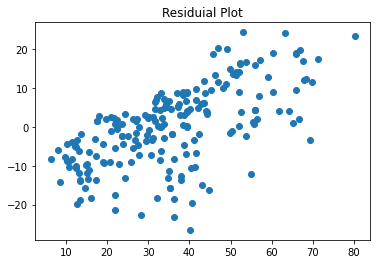

In [62]:
plt.title('Residuial Plot')
plt.plot(y_test, residuials, 'o')

In [79]:
# This isn't telling me too much other than a trend in the residuals

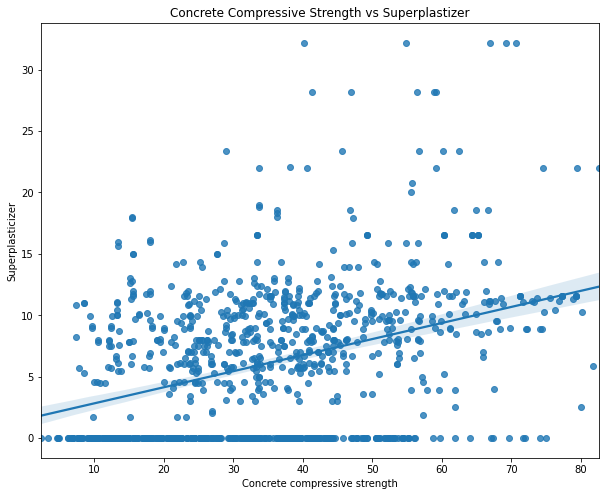

In [74]:
plt.figure(figsize=(10, 8))
plt.title('Concrete Compressive Strength vs Superplastizer')
a = sns.regplot(df_concrete['Concrete compressive strength'], df_concrete['Superplasticizer'])
plt.show(a)

In [83]:
# This idea for the equation of the line was taken from this source:
# https://stackoverflow.com/a/39388183

x_reg = a.get_lines()[0].get_xdata()
y_reg = a.get_lines()[0].get_ydata()

# Using the point slope formula
# https://www.khanacademy.org/math/cc-eighth-grade-math/cc-8th-linear-equations-functions/8th-slope/a/slope-formula

slope = (y_reg[-1] - y_reg[0]) / (x_reg[-1] - x_reg[0])
intercept = (y_reg[0], x_reg[0])
slope, intercept

(0.13090689750609366, (1.8208550942537027, 2.33))

In [80]:
# The slope doesn't tell me much, but the spread of the data sort of looks like a fan
# let's try a log for the y axis

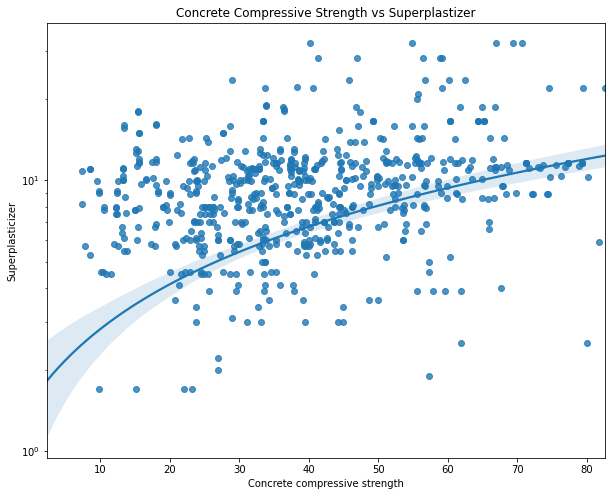

In [81]:
plt.figure(figsize=(10, 8))
plt.title('Concrete Compressive Strength vs Superplastizer')
a = sns.regplot(df_concrete['Concrete compressive strength'], df_concrete['Superplasticizer'])
plt.yscale('log')
plt.show(a)

In [84]:
slope, intercept

(0.13090689750609366, (1.8208550942537027, 2.33))

In [ ]:
# Source for regression plot: 
# https://seaborn.pydata.org/tutorial/regression.html

In [85]:
# Looking at this plot for any identifiable correlations by using seaborn's regression linear plot
# And taking into account the R^2 value from testing Superplastizer with Concrete Compressive Strength

# I can say that Superplastizer does have an effect on the concrete compressive strength
# Using a log scale, it reminds me of the stress-strain curves used in material science
# see here for source: https://en.wikipedia.org/wiki/Stress–strain_curve

# I know that concrete is compressive, so positive stress means nothing
# If we look at this plot where concrete compressive strength is negative strain
# then at higher compressive loads, we can infer that the usage of superplastizier does indeed help
# Extrapolating the data, we can say that for our Linear model that Superplastizer is most efficent at 
# concrete compressive loads above.

# Because we know that the line is linear, we have the equation for it

In [86]:
# I have run out of time to do additional analysis, but I would extrapolate the line using 
# another plot then estimate what its effectiveness wo